1. Загрузка данных

In [1]:
# Посмотрим данные датасета

# Загрузим тренировочные данные
import pandas as pd
from pandas.core.interchange.from_dataframe import categorical_column_to_series

from sklearn.preprocessing import StandardScaler
from untitled1.venv.Lib.enum import unique

train_df = pd.read_csv('train.csv')

# Посмотрим на первые 5 строк
print(train_df.head())

# Выведем список всех столбцов
print(train_df.columns)

   id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   

2 Предварительный анализ данных

In [10]:
# Посмотрим общую информацию о данных. Типы данных и количество ненулевых значений в каждом столбце

# Посмотрим на первые 5 строк
print(train_df.head())

# Количество строк и столбцов
print(train_df.shape)

# Выведем список всех столбцов
print(train_df.columns)

# Посмотрим на первые 5 строк
print(train_df.head())

 # Информация о типах данных и пропущенных значениях
print(train_df.info())

# Статистика по числовым данным
print(train_df.describe())

# Количество уникальных значений в каждом столбце
unique_counts = train_df.nunique()
print('Количество уникальных значений в каждом столбце:\n', unique_counts)




NameError: name 'train_df' is not defined

Выявим пропуски данных

In [11]:
# Количество пропущенных значений в каждом столбце
print(train_df.isnull().sum())

NameError: name 'train_df' is not defined

Выявим категориальные признаки

In [19]:
# Проверим какие столбцы являются категориальными
print(train_df.dtypes)

# Выберем столбцы с типами данных object, которые обычно представляют категориальные признаки
categorical_cols = train_df.select_dtypes(include=[object])

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

Преобразование категориальных данных

In [29]:
from sklearn.preprocessing import LabelEncoder

# Инициализируем кодировщик
label_encoder = LabelEncoder()

# Применим к категориальному столбцу
train_df['Target_encoded'] = label_encoder.fit_transform(train_df['Target'])
print(train_df[['Target', 'Target_encoded']].head())

     Target  Target_encoded
0  Graduate               2
1   Dropout               0
2   Dropout               0
3  Enrolled               1
4  Graduate               2


Нормирование данных методом  нормализации Min-Max

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[['Target_encoded']] = scaler.fit_transform(train_df[['Target_encoded']])
print(train_df.head())
# Проверка на нормализацию (для Min-Max Scaling должны быть значения от 0 до 1)
print(train_df[['Target_encoded']].min())  # Ожидаем 0
print(train_df[['Target_encoded']].max())  # Ожидаем 1

# Выводим первые строки, чтобы увидеть результат
print(train_df[['Target', 'Target_encoded']].head())

   id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   

Инжиниринг признаков

In [7]:
unique_values = train_df['Target'].unique()
print(unique_values)
unique_counts = train_df.nunique()
print('Количество уникальных значений в каждом столбце:\n', unique_counts)


NameError: name 'train_df' is not defined

In [3]:
# Полиномиальные признаки
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

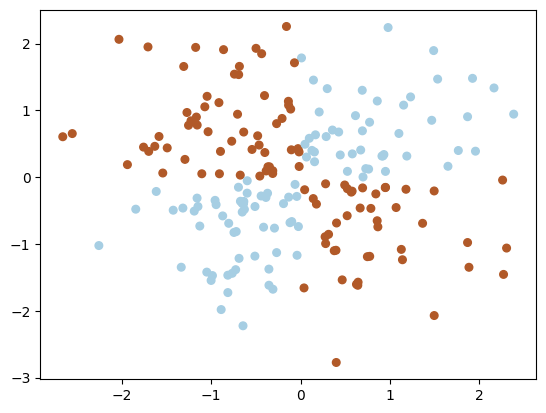

In [2]:
# порождаем данные


# 1. Загрузка данных
url = "https://www.kaggle.com/competitions/playground-series-s4e6"  
data = pd.read_csv(url)


# 2. Предварительная обработка данных
# Предположим, что мы используем 'Admission grade' и 'Age at enrollment' как примеры признаков
X = data[['Admission grade', 'Age at enrollment']].values  # Замените на ваши признаки

# Целевая переменная (например, 'Target' может быть бинарной)
# Преобразуем целевую переменную в логическую
y = data['Target'].apply(lambda x: 1 if x == 'some_value' else 0).values  # Замените 'some_value' на значение, которое вас интересует

# 3. Визуализация данных
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
plt.xlabel('Admission Grade')
plt.ylabel('Age at Enrollment')
plt.title('Scatter Plot of Admission Grade vs Age at Enrollment')
plt.colorbar(label='Target')
plt.show()
